Code from:
* https://elitedatascience.com/keras-tutorial-deep-learning-in-python
* https://github.com/parneetk/Neural-Networks-in-Keras/blob/master/02_CNN_MNIST.ipynb
* https://github.com/yashk2810/MNIST-Keras/blob/master/Notebook/MNIST_keras_CNN-99.55%25.ipynb

In [1]:
from keras import backend as K
if K.backend()=='tensorflow':
    K.set_image_dim_ordering("th")

/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
import time
import matplotlib.pyplot as plt
import numpy as np
import csv as csv
import pandas as pd

from keras.utils import np_utils
from keras.models import Sequential
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.layers import Activation, Flatten, Dense, Dropout
from keras.optimizers import SGD
from keras.layers.normalization import BatchNormalization
% matplotlib inline
np.random.seed(2017)
from keras.optimizers import Adam
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D, GlobalAveragePooling2D
from keras.layers.advanced_activations import LeakyReLU 
from keras.preprocessing.image import ImageDataGenerator

In [3]:
num_classes = 26
num_input_nodes = 784

In [4]:
train_df = pd.read_csv("./emnist/emnist-letters-train.csv",header=0)
test_df = pd.read_csv("./emnist/emnist-letters-test.csv",header=0)
train_data = train_df.values
test_data = test_df.values

Xtrain = train_data[0::,1::]
ytrain = train_data[0::,0]
Xtest = test_data[0::,1::]
ytest = test_data[0::,0]

In [5]:
xtrain = Xtrain.reshape(Xtrain.shape[0], 1, 28, 28)
xtest = Xtest.reshape(Xtest.shape[0], 1, 28, 28)

xtrain = xtrain.astype('float32')
xtest = xtest.astype('float32')

#xtrain/=255
#xtest/=255

print ytest.shape

(14799,)


In [6]:
ytrain = np.subtract(ytrain,1)
ytest = np.subtract(ytest,1)
Y_train = np_utils.to_categorical(ytrain, 26)
Y_test = np_utils.to_categorical(ytest, 26)
print Y_train.shape

(88799, 26)


In [30]:
def plot_model_history(model_history, name):
    fig, axs = plt.subplots(1,2,figsize=(15,5))

    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xlim([1,10])
    axs[0].set_ylim([0.75,1])
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')

    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xlim([1,10])
    axs[1].set_ylim([0,1])
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()
    fig.savefig(name+".png")

In [8]:
def accuracy(test_x, test_y, model):
    result = model.predict(test_x)
    predicted_class = np.argmax(result, axis=1)
    true_class = np.argmax(test_y, axis=1)
    num_correct = np.sum(predicted_class == true_class) 
    accuracy = float(num_correct)/result.shape[0]
    return (accuracy * 100)

In [9]:
# Three steps to Convolution
# 1. Convolution
# 2. Activation
# 3. Polling
# Repeat Steps 1,2,3 for adding more hidden layers

# 4. After that make a fully connected network
# This fully connected network gives ability to the CNN
# to classify the samples

model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=(1,28,28)))
model.add(Activation('relu'))
BatchNormalization(axis=-1)
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

BatchNormalization(axis=-1)
model.add(Conv2D(64,(3, 3)))
model.add(Activation('relu'))
BatchNormalization(axis=-1)
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
# Fully connected layer

BatchNormalization()
model.add(Dense(512))
model.add(Activation('relu'))
BatchNormalization()
model.add(Dropout(0.2))
model.add(Dense(26))

model.add(Activation('softmax'))

Instructions for updating:
keep_dims is deprecated, use keepdims instead


In [10]:
model.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
keep_dims is deprecated, use keepdims instead


In [11]:
gen = ImageDataGenerator(rotation_range=8, width_shift_range=0.08, shear_range=0.3, height_shift_range=0.08, zoom_range=0.08)

test_gen = ImageDataGenerator()

train_generator = gen.flow(xtrain, ytrain, batch_size=64)
test_generator = test_gen.flow(xtest, ytest, batch_size=64)

In [12]:
model1_info=model.fit_generator(train_generator, steps_per_epoch=60000//64, epochs=10, validation_data=test_generator, validation_steps=10000//64)

Epoch 1/10
937/937 [==============================] - 410s 438ms/step - loss: 0.9205 - acc: 0.7565 - val_loss: 0.3005 - val_acc: 0.8947
Epoch 2/10
937/937 [==============================] - 412s 440ms/step - loss: 0.3572 - acc: 0.8836 - val_loss: 0.2517 - val_acc: 0.9140
Epoch 3/10
937/937 [==============================] - 412s 440ms/step - loss: 0.3088 - acc: 0.8987 - val_loss: 0.2246 - val_acc: 0.9236
Epoch 4/10
937/937 [==============================] - 775s 827ms/step - loss: 0.2780 - acc: 0.9081 - val_loss: 0.2198 - val_acc: 0.9224
Epoch 5/10
937/937 [==============================] - 420s 448ms/step - loss: 0.2607 - acc: 0.9120 - val_loss: 0.2145 - val_acc: 0.9273
Epoch 6/10
937/937 [==============================] - 657s 702ms/step - loss: 0.2559 - acc: 0.9134 - val_loss: 0.2140 - val_acc: 0.9261
Epoch 7/10
937/937 [==============================] - 420s 449ms/step - loss: 0.2386 - acc: 0.9186 - val_loss: 0.2200 - val_acc: 0.9266
Epoch 8/10
937/937 [============================

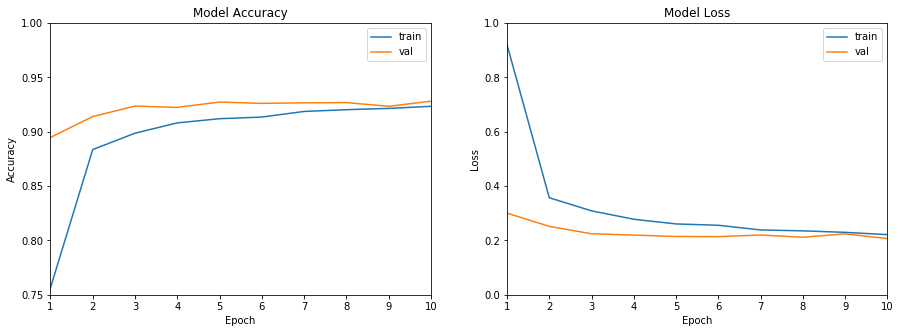

In [31]:
plot_model_history(model1_info,'cnn')

In [14]:
score = model.evaluate(xtest, ytest)
print()
print('Test accuracy: ', score[1])

14799/14799 [==============================] - 50s 3ms/step
()
('Test accuracy: ', 0.9285762551564027)


In [15]:
predictions = model.predict_classes(xtest)

predictions = list(predictions)
actuals = list(ytest)

sub = pd.DataFrame({'Actual': actuals, 'Predictions': predictions})
sub.to_csv('./output_cnn.csv', index=False) 

14799/14799 [==============================] - 49s 3ms/step


In [32]:
from sklearn.metrics import confusion_matrix, classification_report

In [33]:
print(classification_report(ytest, predictions))

             precision    recall  f1-score   support

          0       0.95      0.94      0.94       799
          1       0.98      0.97      0.97       800
          2       0.97      0.96      0.96       800
          3       0.94      0.96      0.95       800
          4       0.96      0.97      0.97       800
          5       0.99      0.96      0.98       800
          6       0.90      0.83      0.86       800
          7       0.94      0.97      0.95       800
          8       0.73      0.81      0.77       800
          9       0.99      0.95      0.97       800
         10       0.99      0.97      0.98       800
         11       0.79      0.69      0.74       800
         12       0.99      0.99      0.99       800
         13       0.97      0.94      0.96       800
         14       0.95      0.96      0.96       800
         15       0.98      0.98      0.98       800
         16       0.84      0.90      0.87       800
         17       0.98      0.93      0.95   

/usr/local/lib/python2.7/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


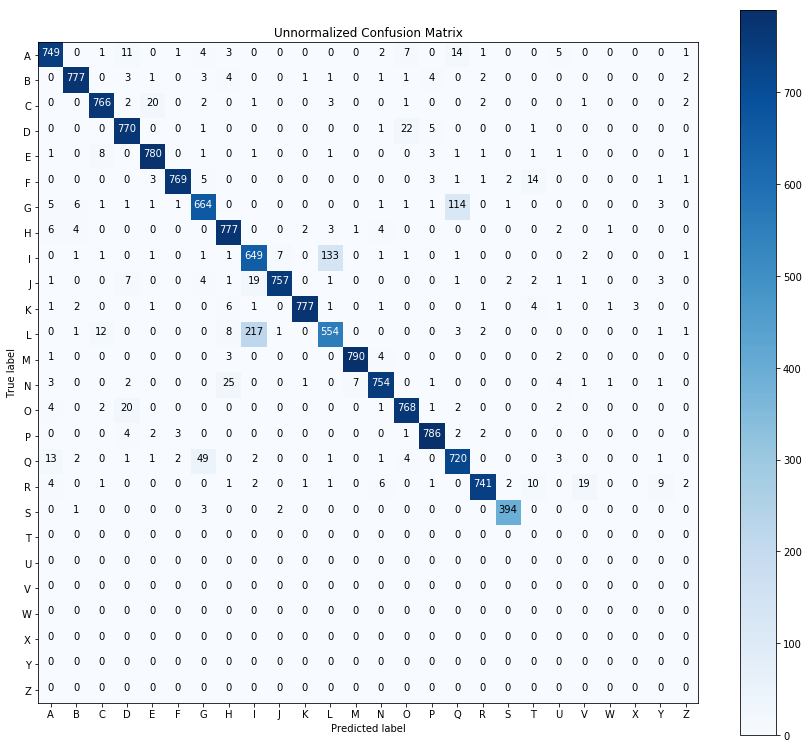

In [38]:
import matplotlib.pyplot as plt
import itertools

cm = confusion_matrix(ytest, predictions)
plt.figure(figsize=(12,10.5))
plt.imshow(cm, cmap = plt.cm.Blues)
plt.colorbar()

classes = ['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z']
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)

thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], 'd'),
    horizontalalignment="center",
    color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Unnormalized Confusion Matrix')
plt.savefig("cmCNN.png")
plt.show()